## Create Latitude and Longitude Combinations

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

* In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.
* In the next cell, add the following code that we used to generate the random latitudes.
* We'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

## Let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-53.60905384139071, 0.10175052449113764),
 (-54.71609242329516, -40.17070988924749),
 (-11.150693964737016, -62.149298319926515),
 (-4.897518022262247, 169.19840493003875),
 (64.72858872839481, 107.53733147752422),
 (-4.850847572261571, -103.42800324677697),
 (60.89372326818125, 48.58811929849341),
 (-46.48129510689717, -161.79898992525642),
 (-16.779150793025835, -19.147618918068616),
 (32.94478580257022, 160.56490984065147),
 (-5.663639989231086, 76.1517617692079),
 (-52.68102447803376, -138.58964982080698),
 (8.57440642907217, -60.67143694957707),
 (62.174721977372315, 35.22399057833542),
 (-29.71456090159169, -36.18371171701068),
 (37.33779329049466, 117.48194781745326),
 (36.86437981717181, -94.95267236179143),
 (16.363090650996213, -27.94053214938114),
 (-2.092222741495462, 22.70569736546213),
 (-83.34069250233047, 88.73977804689974),
 (-31.332537969749332, 137.6082657752725),
 (55.764083620618635, 108.50801903885849),
 (21.900156559750826, -51.3242411350048),
 (-76.77178792469

# 6.1.5 Generate Random World Cities

* With our list of random latitudes and longitudes, we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module.

In [5]:
!pip install citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


614

# 6.2.1 Understanding APIs

# 6.2.2 Get Started with OpenWeatherMap API

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b080f7f22dbf268c1c5ab4257892315&q=Boston


## The JavaScript Object Notation Format for API Data

* When we retrieve data from a website, we have to make a "request," which returns data in a text format, not in a tab- or comma-separated file.
* One format we can use to parse data is JavaScript Object Notation (JSON).
* The JSON format is also referred to as an "object" or "JSON object."
* The data inside a JSON object opens and closes with curly braces, much like a Python dictionary.
* Inside the JSON object is a collection of dictionaries and arrays.

## The Python Requests Library


* To request JSON data over the internet, we use the Requests Library in Python.
* The Anaconda installation comes with version 2.22 of the Requests Library.

In [11]:
import requests
requests.__version__

'2.26.0'

# 6.2.5 Parse a Response from an API
Before we collect weather data from more than 500 cities, we'll walk through how to get the weather data from Boston.

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 14.86,
  'feels_like': 14.86,
  'temp_min': 6.85,
  'temp_max': 21.67,
  'pressure': 1032,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 299},
 'clouds': {'all': 11},
 'dt': 1643685779,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1643630333,
  'sunset': 1643666182},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

### 1. In a new cell, let's assign a variable to the city_weather.json() data to the variable "boston_data" and run the cell.

In [13]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 14.86,
  'feels_like': 14.86,
  'temp_min': 6.85,
  'temp_max': 21.67,
  'pressure': 1032,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 299},
 'clouds': {'all': 11},
 'dt': 1643685779,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1643630333,
  'sunset': 1643666182},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

## 2. Next, using the sys key to get the corresponding value, we type boston_data['sys'] in a new cell and run the cell. The output is another dictionary as shown in the following image.

In [14]:
boston_data["sys"]

{'type': 2,
 'id': 2001997,
 'country': 'US',
 'sunrise': 1643630333,
 'sunset': 1643666182}

## 3. If we add the country key in brackets after the sys key, and run the cell again, ‘US’ will be returned in the output.

In [15]:
boston_data["sys"]["country"]

'US'

If we want to retrieve the date in the weather data, we would add the dt key to the boston_data variable like this: boston_data["dt"].

In [16]:
boston_data["dt"]

1643685779

* Using similar syntax to get the time of day, we can get the latitude, longitude, maximum temperature, humidity, percent cloudiness, and wind speed.

Add the following code to a new cell and run the cell.

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 21.67 77 11 1.01


## Convert the Date Timestamp

*If we want to convert the timestamp to the International Organization for Standardization (ISO) format, or YYYY-MM-DD-HH-MM-SS, we need to use the Python datetime module.

Let's convert the date from the Boston weather data in the JSON format to the ISO format.

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 2, 1, 3, 22, 59)

We can convert this datetime format to 2019-10-21 17:24:35 using the Python string format method strftime() and adding how we want the string to look inside the parentheses

In [19]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-02-01 03:22:59'

# 6.2.6 Get the City Weather Data

## Import Dependencies, and Initialize an Empty List and Counters

* At the top of our code block, we are going to declare an empty list, city_data = []; add a print statement that references the beginning of the logging; and create counters for the record numbers, 1–50; and the set counter.

We will now work in our WeatherPy.ipynb file. Before continuing, make sure the following tasks are completed:

* Import your Requests Library and the weather_api_key.
* Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
* Also, import the time library, as well as the datetime module using the following code:

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

Next, add the following code to a new cell, but don't run the cell. Instead, continue to add on to this code block.


In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | presidente medici
Processing Record 4 of Set 1 | utiroa
City not found. Skipping...
Processing Record 5 of Set 1 | yerbogachen
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | mabaruma
Processing Record 14 of Set 1 | povenets
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | binzhou
Processing Record 17 of Set 1 | miami
Processing Record 18 of Set 1 | porto novo
Processing Record 19 of Set 1 | lodja
Processing Record 20 of Set 1 | busselton
Processi

Processing Record 35 of Set 4 | castro
Processing Record 36 of Set 4 | cayenne
Processing Record 37 of Set 4 | rafaela
Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | katha
City not found. Skipping...
Processing Record 40 of Set 4 | phitsanulok
Processing Record 41 of Set 4 | abbeville
Processing Record 42 of Set 4 | tarko-sale
Processing Record 43 of Set 4 | farah
Processing Record 44 of Set 4 | cervo
Processing Record 45 of Set 4 | rabwah
City not found. Skipping...
Processing Record 46 of Set 4 | saint-felicien
Processing Record 47 of Set 4 | kralendijk
Processing Record 48 of Set 4 | lilongwe
Processing Record 49 of Set 4 | kahului
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | samusu
City not found. Skipping...
Processing Record 3 of Set 5 | wanlaweyn
Processing Record 4 of Set 5 | banda aceh
Processing Record 5 of Set 5 | mrirt
City not found. Skipping...
Processing Record 6 o

Processing Record 22 of Set 8 | boo
Processing Record 23 of Set 8 | bucerias
Processing Record 24 of Set 8 | yatou
Processing Record 25 of Set 8 | jacmel
Processing Record 26 of Set 8 | panama city
Processing Record 27 of Set 8 | kabakovo
Processing Record 28 of Set 8 | yar-sale
Processing Record 29 of Set 8 | daliao
Processing Record 30 of Set 8 | norman wells
Processing Record 31 of Set 8 | kandrian
Processing Record 32 of Set 8 | mahibadhoo
Processing Record 33 of Set 8 | qui nhon
Processing Record 34 of Set 8 | changzhou
Processing Record 35 of Set 8 | buala
Processing Record 36 of Set 8 | general roca
Processing Record 37 of Set 8 | calabozo
Processing Record 38 of Set 8 | rungata
City not found. Skipping...
Processing Record 39 of Set 8 | ayan
Processing Record 40 of Set 8 | kutum
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | kirakira
Processing Record 43 of Set 8 | show low
Processing Record 44 of Set 8 | la libertad
Processing Record 45 of Set 8 | xich

Processing Record 13 of Set 12 | nova odesa
Processing Record 14 of Set 12 | carutapera
Processing Record 15 of Set 12 | gerede
Processing Record 16 of Set 12 | sataua
City not found. Skipping...
Processing Record 17 of Set 12 | elko
Processing Record 18 of Set 12 | neyshabur
Processing Record 19 of Set 12 | colac
Processing Record 20 of Set 12 | evensk
Processing Record 21 of Set 12 | viedma
Processing Record 22 of Set 12 | pandharpur
Processing Record 23 of Set 12 | wana
Processing Record 24 of Set 12 | emilio carranza
Processing Record 25 of Set 12 | akureyri
Processing Record 26 of Set 12 | aden
Processing Record 27 of Set 12 | ogulin
Processing Record 28 of Set 12 | gunnedah
Processing Record 29 of Set 12 | preston
Processing Record 30 of Set 12 | hualmay
Processing Record 31 of Set 12 | buraydah
Processing Record 32 of Set 12 | skopelos
Processing Record 33 of Set 12 | te anau
Processing Record 34 of Set 12 | kumo
Processing Record 35 of Set 12 | alofi
Processing Record 36 of Set

In [22]:
len(city_data)

562

# 6.2.7 Create a DataFrame of City Weather Data

### Convert the array of dictionaries to a Pandas DataFrame

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,74.12,82,0,1.01,ZA,2022-02-01 03:21:29
1,Mar Del Plata,-38.0023,-57.5575,63.88,59,0,5.01,AR,2022-02-01 03:24:59
2,Presidente Medici,-11.1753,-61.9014,70.14,98,100,3.09,BR,2022-02-01 03:24:59
3,Yerbogachen,61.2767,108.0108,-11.24,99,89,2.93,RU,2022-02-01 03:25:00
4,Puerto Ayora,-0.7393,-90.3518,73.54,96,93,5.99,EC,2022-02-01 03:25:00
5,Avarua,-21.2078,-159.7750,78.85,83,20,13.80,CK,2022-02-01 03:25:01
6,Georgetown,5.4112,100.3354,87.73,71,20,8.05,MY,2022-02-01 03:25:01
7,Hithadhoo,-0.6000,73.0833,82.45,72,9,12.62,MV,2022-02-01 03:25:01
8,Rikitea,-23.1203,-134.9692,78.35,66,93,6.46,PF,2022-02-01 03:25:02
9,Mabaruma,8.2000,-59.7833,71.10,96,100,2.42,GY,2022-02-01 03:25:02


### Reorder columns in the DataFrame

In [24]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness",
                            "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-02-01 03:21:29,-33.9258,18.4232,74.12,82,0,1.01
1,Mar Del Plata,AR,2022-02-01 03:24:59,-38.0023,-57.5575,63.88,59,0,5.01
2,Presidente Medici,BR,2022-02-01 03:24:59,-11.1753,-61.9014,70.14,98,100,3.09
3,Yerbogachen,RU,2022-02-01 03:25:00,61.2767,108.0108,-11.24,99,89,2.93
4,Puerto Ayora,EC,2022-02-01 03:25:00,-0.7393,-90.3518,73.54,96,93,5.99
5,Avarua,CK,2022-02-01 03:25:01,-21.2078,-159.7750,78.85,83,20,13.80
6,Georgetown,MY,2022-02-01 03:25:01,5.4112,100.3354,87.73,71,20,8.05
7,Hithadhoo,MV,2022-02-01 03:25:01,-0.6000,73.0833,82.45,72,9,12.62
8,Rikitea,PF,2022-02-01 03:25:02,-23.1203,-134.9692,78.35,66,93,6.46
9,Mabaruma,GY,2022-02-01 03:25:02,8.2000,-59.7833,71.10,96,100,2.42


### Create an output file to save the DataFrame as a CSV in a new folder for that file

In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities1.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

Retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

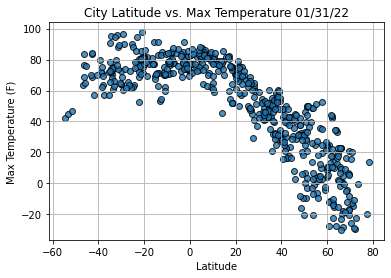

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

In addition to changing the y-axis variable to "humidity," we need to change the title to "Humidity," and the y-axis label to "Humidity (%)."

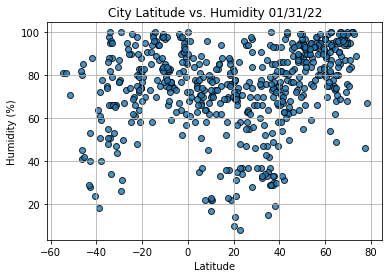

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."

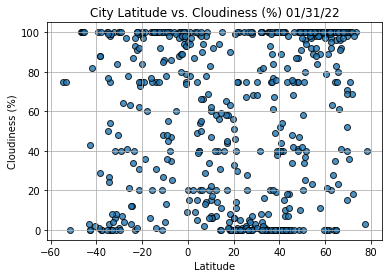

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

Let's repurpose the code we have been using and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."

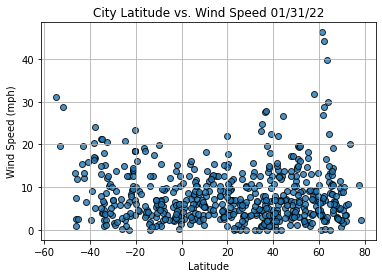

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables

Practice Using Linear Regression...random_number file

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

## Create a Linear Regression Function

In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, and we will add a fifth parameter for the title, called, title. Now, add the algorithm we use to perform the linear regression underneath the function. Our function should look like the following.

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates,):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create the Hemisphere DataFrames

We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres.

To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may see a different city in your output cell than the one shown in the following image.


In [32]:
index13 = city_data_df.loc[13]
index13

City                        Miami
Country                        US
Date          2022-02-01 03:24:20
Lat                       25.7743
Lng                      -80.1937
Max Temp                     66.0
Humidity                       63
Cloudiness                     20
Wind Speed                   1.01
Name: 13, dtype: object

We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.

In [33]:
city_data_df["Lat"]>=0

0      False
1      False
2      False
3       True
4      False
       ...  
557    False
558     True
559     True
560    False
561     True
Name: Lat, Length: 562, dtype: bool

If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.

* We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.

To create DataFrames for the Northern and Southern Hemispheres' data, add the code to a new cell and run the code.

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

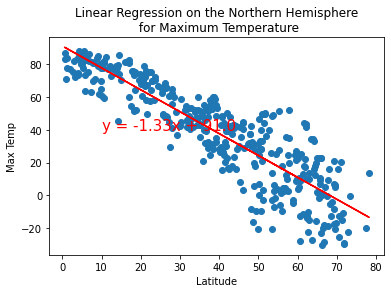

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))
                       

## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

To generate the linear regression on the maximum temperature for the Southern Hemisphere, reuse the code for the Northern Hemisphere and replace the northern_hemi_df DataFrame with the southern_hemi_df DataFrame to get the x- and y-values.

Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

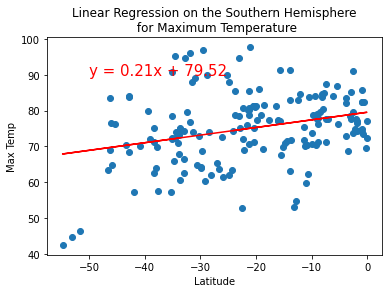

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

Using the plot_linear_regression function, we can generate the regression lines on the percent humidity for the Northern and Southern Hemispheres.



To perform the linear regression on the percent humidity for the Northern Hemisphere, set the x-value equal to the latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame.

Call the plot_linear_regression function

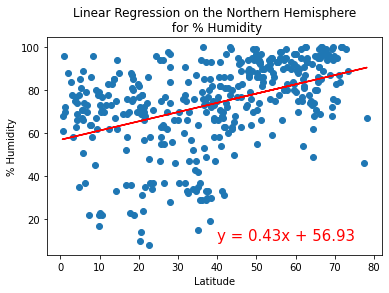

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))
                        

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

For our linear regression line and plot of the percent humidity and latitudes for the Southern Hemisphere, set the x-value equal to the latitude column and y-value equal to the humidity column from the southern_hemi_df DataFrame.

Call the plot_linear_regression function, with the x-and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

Add the code to a new cell and run it to generate the linear regression and plot the data.

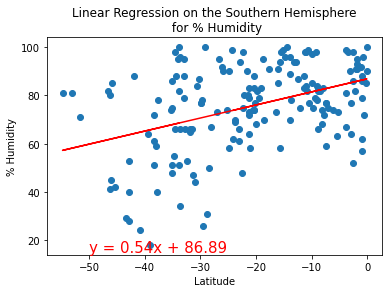

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

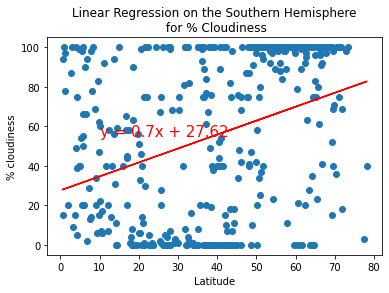

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% cloudiness',(10,55))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

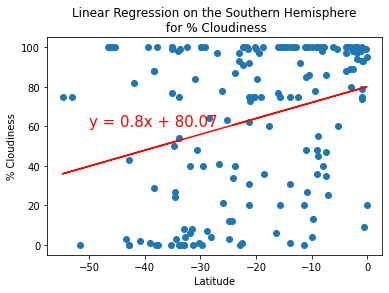

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))
                        

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere


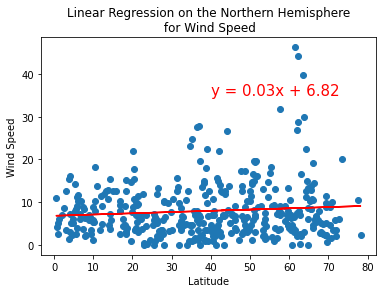

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))
                        

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

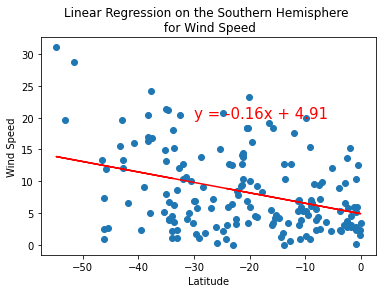

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,20))   

# 6.5.1 Set Up Google Maps and Places API

In [46]:
!pip install gmaps

# 6.5.2 Create Heatmaps for Weather Parameters

The amount of coding needed to create a heatmap is small. For a basic heatmap, all we need to do is provide the following:

Latitudes and longitudes for the locations
A measurement value for each latitude and longitude in the form of arrays that have the same number of items in each array

Begin by importing our dependencies and Google API key, and then add our cities.csv file to a DataFrame. Create a new Jupyter Notebook file named VacationPy.ipynb. In the first cell, add our dependencies and API key.

In [2]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import gkey

Let's review how we will use our dependencies. We'll use Pandas to read our CSV file and create the locations and measurements from the DataFrame. We'll use gmaps and the API key to create heatmaps and the locations map, and we'll use the requests dependency to make a request to the Google Places JSON file. This will allow us to get hotel locations from the latitude and longitude of the city.

Next, we'll read our cities.csv file into a DataFrame. Add the following code and run it to create the DataFrame.

In [3]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities1.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Cape Town,ZA,2022-02-01 03:21:29,-33.9258,18.4232,74.12,82,0,1.01
1,1,Mar Del Plata,AR,2022-02-01 03:24:59,-38.0023,-57.5575,63.88,59,0,5.01
2,2,Presidente Medici,BR,2022-02-01 03:24:59,-11.1753,-61.9014,70.14,98,100,3.09
3,3,Yerbogachen,RU,2022-02-01 03:25:00,61.2767,108.0108,-11.24,99,89,2.93
4,4,Puerto Ayora,EC,2022-02-01 03:25:00,-0.7393,-90.3518,73.54,96,93,5.99
...,...,...,...,...,...,...,...,...,...,...
557,557,Atambua,ID,2022-02-01 03:40:32,-9.1061,124.8925,78.98,78,48,15.32
558,558,Hurricane,US,2022-02-01 03:38:32,37.1753,-113.2899,48.02,33,84,2.19
559,559,Biskamzha,RU,2022-02-01 03:40:33,53.4497,89.5272,13.69,92,100,1.99
560,560,Ygatimi,PY,2022-02-01 03:40:33,-24.0833,-55.5000,74.37,62,34,3.15


In [4]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

## Create a Maximum Temperature Heatmap
First, tell gmaps to use your API key. You only need to configure gmaps to use your API key once.

city_data_df = city_data_df[city_data_df["Max Temp"]>0]

In [5]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=gkey)

## create the heatmap for the maximum temperature


####  Adjust Heatmap Zoom, Intensity, and Point Radius
* First, add the geographic center of Earth in the form of latitude and longitude (30.0° N and 31.0° E). Also, add a zoom level so that only one map of Earth is shown.
* When we add a center and zoom level to the gmaps.figure() attribute, it will look like this:

In [6]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp],
                                 dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Create a Percent Humidity Heatmap

In [7]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Create a Percent Cloudiness Heatmap

In [8]:
# Heatmap of percent Cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Create a Wind Speed Heatmap

In [9]:
# Heatmap of percent Wind Speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# 6.5.3 Get Vacation Criteria
For the app we are creating, we need to prompt the user to enter the minimum and maximum temperature ranges as floating-point decimal numbers to filter the city_data_df DataFrame.

In a new cell, we'll write two input statements for the app that will prompt the customer to add minimum and maximum temperature values and convert these values to floating-point decimals.

The statement can be whatever you want it to be, but for our app, we'll prompt the customer with the following two input statements.

In [10]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 20
What is the maximum temperature you would like for your trip? 89


Next, filter the maximum temperature column in the city_data_df DataFrame using logical operators to create a new DataFrame with the cities that meet the customer's criteria.

* The conditional filter will be city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"]>= min_temp. Also, filter the city_data_df DataFrame using the following statement.




In [11]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Cape Town,ZA,2022-02-01 03:21:29,-33.9258,18.4232,74.12,82,0,1.01
1,1,Mar Del Plata,AR,2022-02-01 03:24:59,-38.0023,-57.5575,63.88,59,0,5.01
2,2,Presidente Medici,BR,2022-02-01 03:24:59,-11.1753,-61.9014,70.14,98,100,3.09
4,4,Puerto Ayora,EC,2022-02-01 03:25:00,-0.7393,-90.3518,73.54,96,93,5.99
5,5,Avarua,CK,2022-02-01 03:25:01,-21.2078,-159.7750,78.85,83,20,13.80
6,6,Georgetown,MY,2022-02-01 03:25:01,5.4112,100.3354,87.73,71,20,8.05
7,7,Hithadhoo,MV,2022-02-01 03:25:01,-0.6000,73.0833,82.45,72,9,12.62
8,8,Rikitea,PF,2022-02-01 03:25:02,-23.1203,-134.9692,78.35,66,93,6.46
9,9,Mabaruma,GY,2022-02-01 03:25:02,8.2000,-59.7833,71.10,96,100,2.42
11,11,Arraial Do Cabo,BR,2022-02-01 03:25:03,-22.9661,-42.0278,75.06,94,0,0.00


* Before moving on, determine if the preferred_cities_df DataFrame has any null values for any of the rows.

In [12]:
preferred_cities_df.count()

City_ID       444
City          444
Country       442
Date          444
Lat           444
Lng           444
Max Temp      444
Humidity      444
Cloudiness    444
Wind Speed    444
dtype: int64

# 6.5.4 Map Vacation Criteria
Using the coordinates from the preferred_cities_df DataFrame, find a hotel using our Google Places API and then retrieve that hotel information. Once we retrieve the hotel information, we'll need to store it so we can reference it and add the information to the pop-up marker.

## Get Travel Destinations
Don't add the hotel information to the preferred_cities_df DataFrame because this DataFrame is our filtered DataFrame, and the customer will always filter it for each trip. We'll need to create a new DataFrame specifically for the data needed to create a heatmap and pop-up markers.

Make a copy of the preferred_cities_df DataFrame and name it hotel_df. For the hotel_df, keep the columns "City," "Country," "Max Temp," "Lat," and "Lng." Add a new column to the hotel_df DataFrame to hold the name of the hotel.


In [13]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Cape Town,ZA,74.12,-33.9258,18.4232,
1,Mar Del Plata,AR,63.88,-38.0023,-57.5575,
2,Presidente Medici,BR,70.14,-11.1753,-61.9014,
4,Puerto Ayora,EC,73.54,-0.7393,-90.3518,
5,Avarua,CK,78.85,-21.2078,-159.7750,
6,Georgetown,MY,87.73,5.4112,100.3354,
7,Hithadhoo,MV,82.45,-0.6000,73.0833,
8,Rikitea,PF,78.35,-23.1203,-134.9692,
9,Mabaruma,GY,71.10,8.2000,-59.7833,
11,Arraial Do Cabo,BR,75.06,-22.9661,-42.0278,


Using the latitude and longitude and specific parameters, use the Google Places Nearby Search request to retrieve a hotel and add it to the Hotel Name column.

## Retrieve Hotels from a Nearby Search
The first step for retrieving hotels from a Nearby Search is to set the parameters for the search.

### Set the Parameters for a Nearby Search
In a new cell, add the parameters as key-value pairs. Add the params dictionary, API key, type, and radius parameters with the following values.

In [ ]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": gkey
}
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

In [17]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Cape Town,ZA,74.12,-33.9258,18.4232,
1,Mar Del Plata,AR,63.88,-38.0023,-57.5575,
2,Presidente Medici,BR,70.14,-11.1753,-61.9014,
4,Puerto Ayora,EC,73.54,-0.7393,-90.3518,
5,Avarua,CK,78.85,-21.2078,-159.7750,
6,Georgetown,MY,87.73,5.4112,100.3354,
7,Hithadhoo,MV,82.45,-0.6000,73.0833,
8,Rikitea,PF,78.35,-23.1203,-134.9692,
9,Mabaruma,GY,71.10,8.2000,-59.7833,
11,Arraial Do Cabo,BR,75.06,-22.9661,-42.0278,


## Create a Maximum Temperature Heatmap from a Hotel DataFrame
Before we add pop-up markers with hotel information, let's create a heatmap using the maximum temperature from our hotel_df DataFrame by reusing the code and changing the DataFrame name.



# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

If we refer to the gmaps documentation on how to add markers (Links to an external site.), the syntax is markers = gmaps.marker_layer(marker_locations), where the marker_locations are latitudes and longitudes.

Let's add the markers for each city on top of the heatmap. Edit the code we used to create the heatmap to look like the following:

In [18]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [20]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [16]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))